In [3]:
#!pip install seaborn
#!pip install seaborn pandas scikit-learn matplotlib nltk

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score

In [6]:
df = pd.read_csv("spam.csv")
df.head()

,text,target
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [7]:
# Vectorisation TF-IDF
vectorizer = TfidfVectorizer(stop_words="english", max_features=1000)
X_tfidf = vectorizer.fit_transform(df["text"])
X_tfidf.shape

(5572, 1000)

In [8]:
# PCA pour réduire à 2 dimensions
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_tfidf.toarray())

In [9]:
# K-means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

In [10]:
# Clustering hiérarchique
hierarchical = AgglomerativeClustering(n_clusters=2)
hier_labels = hierarchical.fit_predict(X_pca)

In [11]:
# Encodage des labels (spam = 1, ham = 0)
encoder = LabelEncoder()
true_labels = encoder.fit_transform(df["target"])

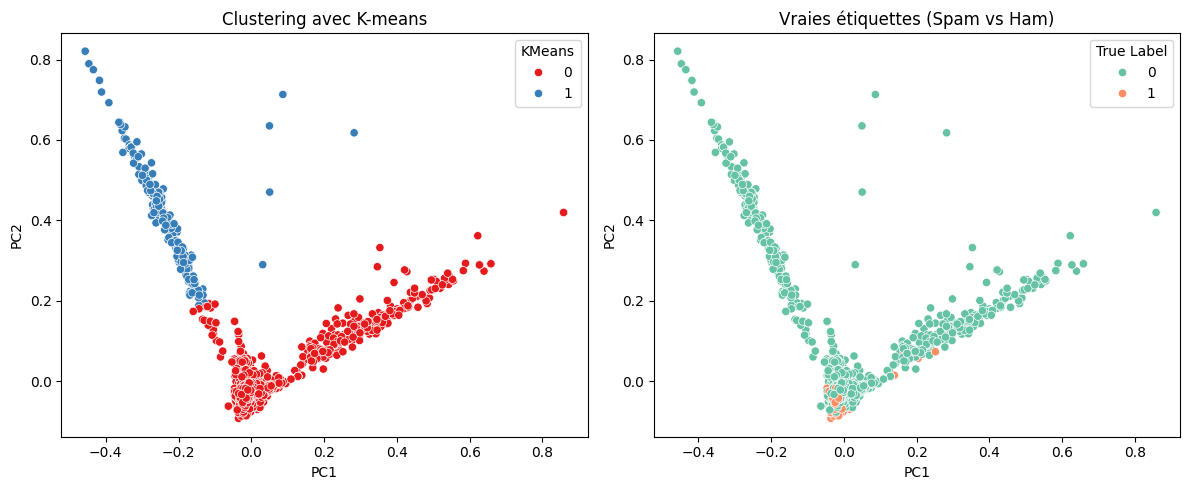

In [12]:
# DataFrame pour la visualisation
plot_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
plot_df['KMeans'] = kmeans_labels
plot_df['True Label'] = true_labels
# Affichage avec Seaborn
plt.figure(figsize=(12, 5))
# K-means
plt.subplot(1, 2, 1)
sns.scatterplot(data=plot_df, x='PC1', y='PC2', hue='KMeans', palette='Set1')
plt.title("Clustering avec K-means")
# Labels réels
plt.subplot(1, 2, 2)
sns.scatterplot(data=plot_df, x='PC1', y='PC2', hue='True Label', palette='Set2')
plt.title("Vraies étiquettes (Spam vs Ham)")
plt.tight_layout()
plt.show()